Intrduction : Telco customer churn

This project analyzes why customers leave telecom companies. It uses a dataset of customer information to find patterns and build a model that predicts who might churn. The goal is to help companies keep more customers by understanding key factors like charges and contracts. It uses Python tools for data analysis and machine learning.

Imports essential libraries for data manipulation (pandas), visualization (matplotlib, seaborn), and machine learning (scikit-learn components).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Loads the Telco Customer Churn dataset from a CSV file and displays the first few rows to preview the data.

In [2]:
#load dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')


#display first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Fixes the 'TotalCharges' column by converting it to numeric values and removes any rows with missing values.

In [3]:
#Fix TotalCharges column
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

Removes the 'customerID' column from the dataset as it's not useful for analysis.

In [4]:
#Drop customerID column
df.drop('customerID', axis=1, inplace=True)

Encodes the 'Churn' target variable into numerical format using LabelEncoder.

In [5]:
#Encode categorical variables
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

Converts all categorical variables in the dataset into dummy/indicator variables for machine learning

In [6]:
#Get dummies for multiple categorical columns
df = pd.get_dummies(df)

Selects specific columns related to contract types, churn, monthly charges, and tenure for focused analysis.

In [7]:
# Select columns related to contract types and key features
contract_cols = [col for col in df.columns if 'Contract_' in col]
analysis_cols = contract_cols + ['Churn', 'MonthlyCharges', 'tenure']

Computes the correlation matrix for the selected columns to understand relationships between features.

In [8]:
#Calculate the correlation matrix
corr_matrix = df[analysis_cols].corr()

 Creates and displays a heatmap visualization of the correlation matrix to show how features relate to churn.

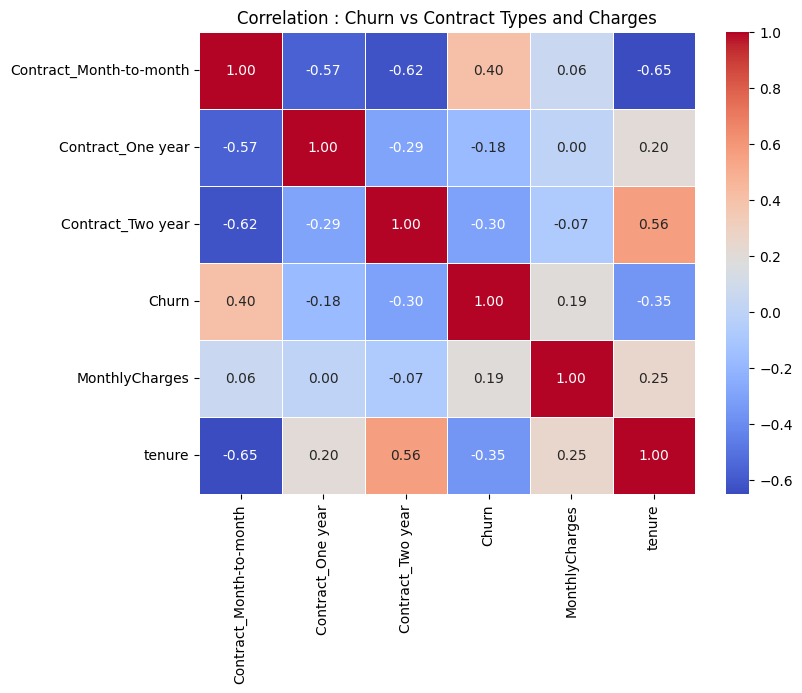

In [9]:
#Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation : Churn vs Contract Types and Charges')
plt.show()

Imports SMOTE for handling class imbalance and separates the features (X) from the target variable (y).

In [10]:
#Handle class imbalance using SMOTE
from imblearn.over_sampling import SMOTE

X = df.drop('Churn', axis=1)
y = df['Churn']

Splits the dataset into training and testing sets using an 80-20 split.

In [11]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Applies SMOTE to the training data to balance the classes and prints the new balanced training set size.

In [12]:
#Apply SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(f'Balanced training set size: {len(y_train_res)}')

Balanced training set size: 8260


Performs exploratory data analysis by plotting the distribution of the churn variable.

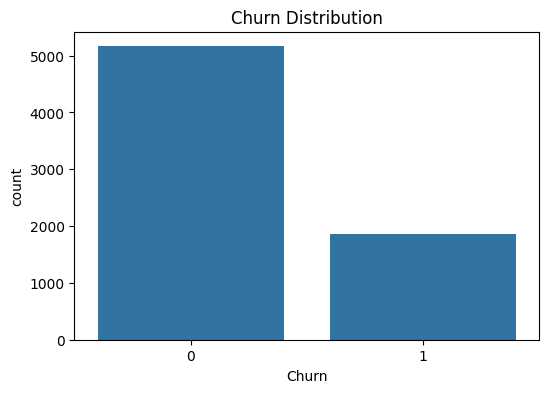

In [13]:
#EDA
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

Trains a Random Forest classifier model on the balanced training data.

In [14]:
#Train a model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_res, y_train_res)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

Makes predictions on the test set and evaluates the model by printing the confusion matrix and classification report.

In [15]:
#Check metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = model.predict(X_test)
print("-----Confusion Matrix-----")
print(confusion_matrix(y_test, y_pred))
print("-----Classification Report-----")    
print(classification_report(y_test, y_pred))

-----Confusion Matrix-----
[[908 125]
 [192 182]]
-----Classification Report-----
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.59      0.49      0.53       374

    accuracy                           0.77      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.77      0.77      1407



Extracts and organizes the feature importance scores from the trained Random Forest model.

In [16]:
#Extract feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

Plots a bar chart of the top 10 most important features driving customer churn.

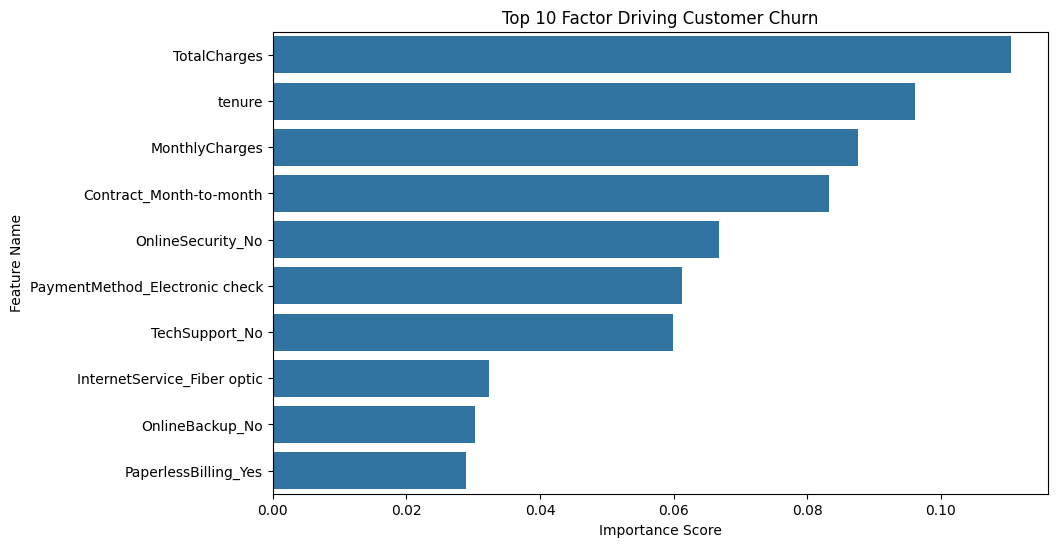

In [17]:
#Plot the top 10
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Factor Driving Customer Churn')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.show()

Generates a detailed classification report and visualizes the confusion matrix with labels for stayed vs. churned customers.

-----Classification Report-----
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.59      0.49      0.53       374

    accuracy                           0.77      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.77      0.77      1407



<Figure size 800x600 with 0 Axes>

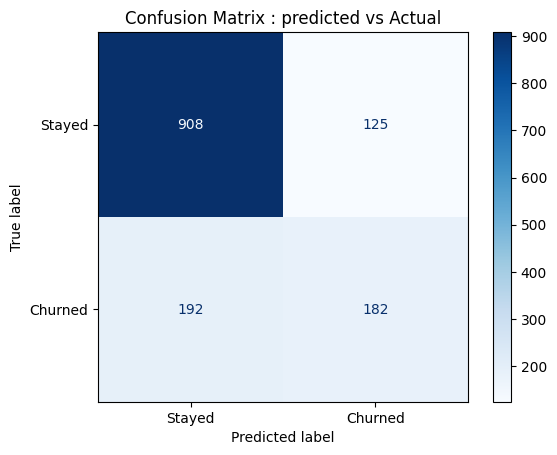

In [18]:
#Evalution
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

#Generate the report
print('-----Classification Report-----')
print(classification_report(y_test, y_pred))

#Plot confusion matrix
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stayed', 'Churned'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix : predicted vs Actual')
plt.show()